In [2]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix

In [3]:
## Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

In [4]:
## Build model (Functional API)
inputs = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [5]:
## Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
## Train
history = model.fit(x_train, y_train, validation_split=0.1, epochs=15, batch_size=128)

Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.3103 - loss: 1.8893 - val_accuracy: 0.4892 - val_loss: 1.4244
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.5033 - loss: 1.3813 - val_accuracy: 0.5532 - val_loss: 1.2485
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.5663 - loss: 1.2161 - val_accuracy: 0.5936 - val_loss: 1.1427
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.6065 - loss: 1.1151 - val_accuracy: 0.6064 - val_loss: 1.1124
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6295 - loss: 1.0551 - val_accuracy: 0.6430 - val_loss: 1.0209
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6565 - loss: 0.9842 - val_accuracy: 0.6610 - val_loss: 0.9625
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6761 - loss: 0.9341 - val_accuracy: 0.6714 - val_loss: 0.9439
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.6878 - loss: 0.8906 - 

In [7]:
model.save("models/cifar10_cnn.h5")


In [8]:
## Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7059 - loss: 0.8804
Test accuracy: 0.6987000107765198


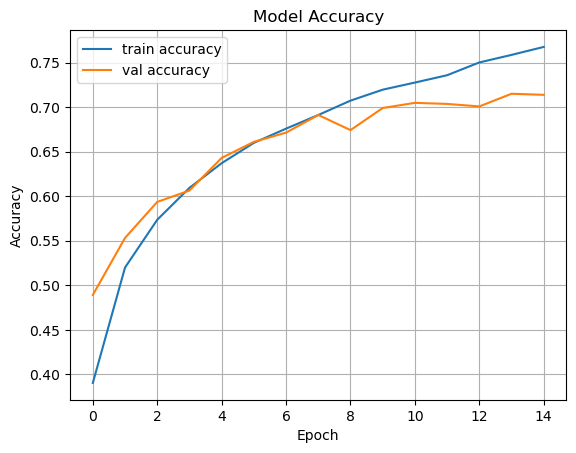

In [9]:
## Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

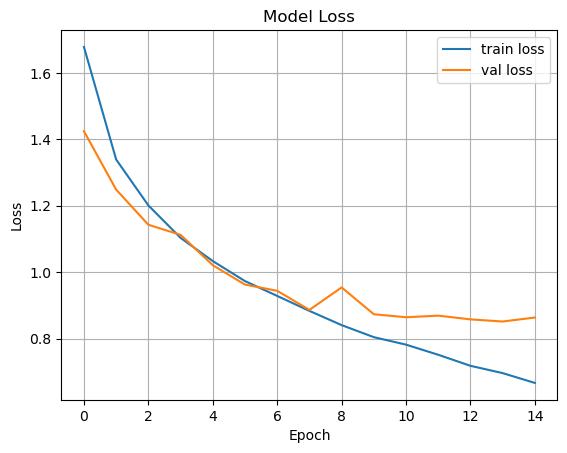

In [10]:
## Loss plot
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


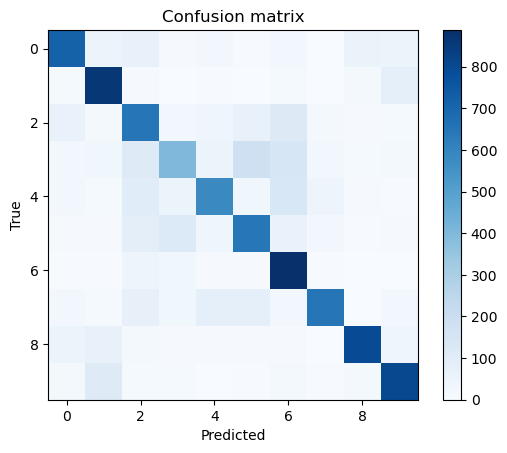

In [11]:
## Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure()
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()